# Student Id : 18203485
# Student Name : Fergus Mc Hale

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets.samples_generator import make_circles

In [2]:
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
X_ori = np.copy(X)

In [4]:
# Add bias=1 column
X = np.insert(X, 0, 1, axis=1)
X

array([[ 1.        , -0.21482759,  0.75307859],
       [ 1.        ,  0.26400226,  0.9895421 ],
       [ 1.        ,  0.2739769 ,  0.97343943],
       ...,
       [ 1.        ,  0.5680632 , -0.57653385],
       [ 1.        ,  0.20883394, -0.92630678],
       [ 1.        , -0.51926849,  0.84795989]])

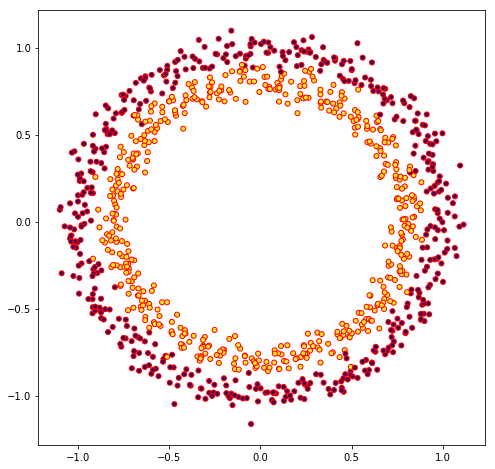

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 1], X[:, 2], marker='o', c=y,s=25, edgecolor='r')
plt.show()

In [6]:
print(X.shape)

(1000, 3)


* h - hypothesis set for linear classifier h(x) = sign(wTx) for classification remove sign for regression
* w - input space and bias w(0)
* d - dimensional input space since x0 - 1 is fixed


# Task 3 (CE6002)

* Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.
* Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).
* Now choose suitable new features and use these in your linear regression algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!
* Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.

In [7]:
# basing on vipuls approach that made the most common sense code wise and is more suitable to a machine learner
class linearmodel(object):
    def __init__(self, selection):
        if selection == "classification":
            self.is_classifier = True
        elif selection == "regression":
            self.is_classifier = False
            
    def fit(self, X, y):
        X_inverse = np.linalg.pinv(X) 
        w_lin = np.matmul(X_inverse, y)
        self.coef_ = w_lin
        
    def product(self,X):
        return (np.dot(X, np.transpose(self.coef_)))
    
    def predict(self, X):
        # Linear classification i.e h(x) - Sign(wTx) 
        # Hard Threashold due to Sign
        if self.is_classifier == True:
            return np.sign(self.product(X))
        
        # Linear Regression i.e h(x) = wTx 
        # No Hard Threashold
        elif self.is_classifier == False:
            return self.product(X)
        
def squared_error(actual, expected):
    error_sq = 0
    N = len(actual)
    for i in range(N):
        error_sq += math.pow((actual[i] - expected[i]),2)
    return math.sqrt(error_sq/N)

def decision_boundary_lin(weights, x_min, x_max):
    return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    return -(weights[0]+weights[1]*x)/weights[2] 

def plot__(X, y, alg):
    test_train_ratio = 0.2
    X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_train_ratio, random_state=0)
    minx = np.amin(X_train)
    maxx = np.amax(X_train)
    horz = [minx, maxx]
    
    alg.fit(X_train, y_train)
    y_out = alg.predict(X_test)
    error_mse = squared_error(y_out, y_test)
    print("Error = ",error_mse)
    plt.scatter(X[:, 1], X[:, 2], marker='o', c=y,s=25, edgecolor='k')
    plt.plot(horz, decision_boundary_lin(alg.coef_, minx, maxx), color='blue')  

    plt.scatter(X_test[:,1], y_out*2, c=y_test)

In [8]:
lm_cls_nor = linearmodel("classification")
lm_cls_nor.fit(X,y)

# X

Error =  1.5362291495737217


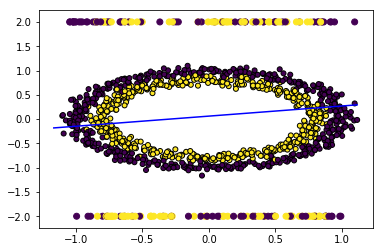

In [9]:
plot__(X, y, lm_cls_nor)

* From the above graph the data is not linearly seperable so the line does not go correctly through the dataset
* The error is high with ~1.435% confirming this is indeed not linearly seperable as the line is not able to pass cleanly through it like below

# X Squared

Error =  0.2


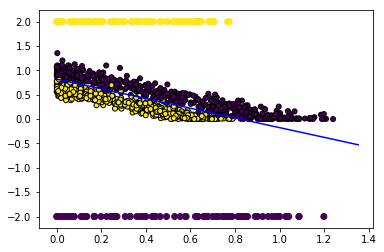

In [10]:
X_square = np.square(X_ori)

# Add bias=1 column
X_square = np.insert(X_square, 0, 1, axis=1)

lm_cls_sqr = linearmodel("classification")
plot__(X_square, y, lm_cls_sqr)

In [11]:
y_hat_out = lm_cls_sqr.predict(X_square)

* By Squaring the values the data now has become linearly seperable with the line able to split through the dataset
* The error rate is lower meaning it is performing better according to generalisation where Ein = Eout where the model is able to generalise better on new or unseen data.

# Scikitlearn

# Linear Regression

In [12]:
scikit_linear_model = LinearRegression(fit_intercept=False)
scikit_linear_model.fit(X_square , np.array(y))

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

Error =  0.4228037256504447


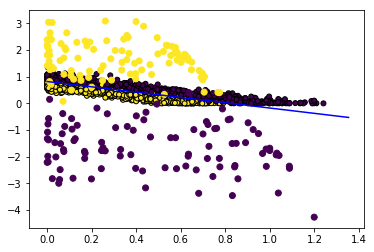

In [13]:
plot__(X_square, y, scikit_linear_model)

In [14]:
y_hat_out = scikit_linear_model.predict(X_square)
linear_mean_squared_error = squared_error(y, y_hat_out)
print("Scikitlearn Linear Regression RMSE :", np.sqrt(linear_mean_squared_error))

Scikitlearn Linear Regression RMSE : 0.6766931381433136


# Logistic Regression

In [15]:
logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(X_square,y)
y_pred = logistic_reg.predict(X_square)

In [16]:
logistic_squared_error = mean_squared_error(y, y_pred)
print("Scikitlearn Linear Regression RMSE :", np.sqrt(logistic_squared_error))

Scikitlearn Linear Regression RMSE : 0.30983866769659335


# Comment

The performance between the bespoke and scikitlearn implementation is marginal.
The bespoke implementation has an error of .2 and scikitlearn has .42